<h2>Objetivo: detectar qué productos son los más comprados por ciertos grupos etarios.</h2>
<h3>Rangos de edad que vamos a evaluar: 18-24, 25-35, 36-49, 50+</h3>

<h4>1.Fase de Análisis exploratorio</h4>

In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [289]:
df_customer = pd.read_csv('https://raw.githubusercontent.com/micaelakorol21/datasets/refs/heads/main/customer_data.csv')

In [290]:
df_customer.shape

(100000, 12)

In [291]:
df_customer.isna().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [292]:
df_customer.dtypes

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [293]:
# Observamos el promedio de ingreso:
df_customer['income'].describe()

count    100000.000000
mean      27516.269880
std       12996.782587
min        5000.000000
25%       16271.750000
50%       27584.500000
75%       38747.250000
max       50000.000000
Name: income, dtype: float64

In [294]:
# Importe de la compra promedio entre hombres y mujeres:
df_customer.groupby("gender")["purchase_amount"].mean()

gender
Female    9634.404601
Male      9635.178224
Name: purchase_amount, dtype: float64

In [295]:
# Categorias mas vendidas
df_customer.groupby("product_category")["purchase_amount"].mean()

product_category
Beauty         9721.366038
Books          9592.935678
Clothing       9634.595327
Electronics    9648.226696
Food           9669.953110
Health         9610.963647
Home           9538.173262
Name: purchase_amount, dtype: float64

In [296]:
# Cuantas categorias hay:
df_customer['product_category'].value_counts()

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64

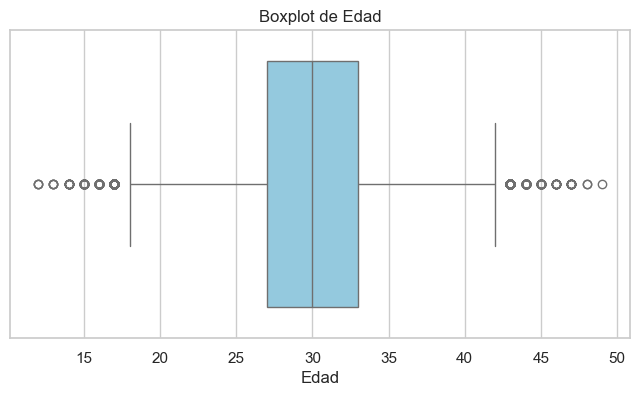

In [297]:
sns.set(style="whitegrid")

# Boxplot de edad
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_customer["age"], color="skyblue")
plt.title("Boxplot de Edad")
plt.xlabel("Edad")
plt.show()

In [298]:
df_customer['age'].describe()

count    100000.000000
mean         30.003260
std           4.480535
min          12.000000
25%          27.000000
50%          30.000000
75%          33.000000
max          49.000000
Name: age, dtype: float64

In [299]:
# Eliminamos los menores de 18 años, ya que nuestro análisis se centra > 18 hasta 99 años.

In [300]:
df_customer = df_customer[df_customer['age'] >= 18]

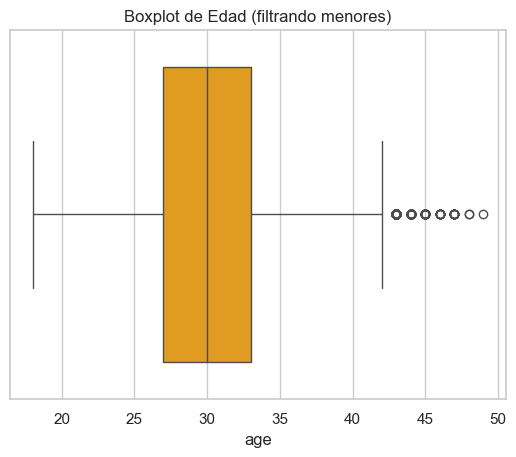

In [301]:
sns.boxplot(x=df_customer["age"], color="orange")
plt.title("Boxplot de Edad (filtrando menores)")
plt.show()

<h4>Analizamos la columna gender: </h4>

In [303]:
# Cuántos registros hay de cada género:
df_customer['gender'].value_counts()

gender
Female    49953
Male      49779
Name: count, dtype: int64

In [304]:
# Porcentaje de representación de cada género:
df_customer['gender'].value_counts(normalize=True) * 100

gender
Female    50.087234
Male      49.912766
Name: proportion, dtype: float64

In [305]:
# Gasto promedio por género:
df_customer.groupby('gender')['purchase_amount'].mean()

gender
Female    9633.442896
Male      9634.217742
Name: purchase_amount, dtype: float64

<Axes: xlabel='gender', ylabel='purchase_amount'>

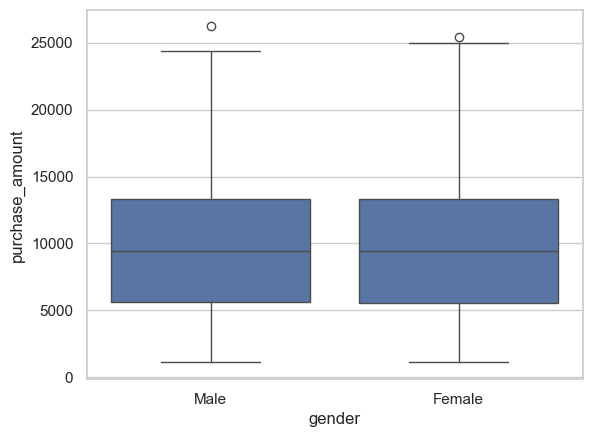

In [306]:
sns.boxplot(data=df_customer, x='gender', y='purchase_amount')

<p>El 25% de los compradores, gastó $6000</p>
<p>El 50% de los compradores, gastó 9500</p>
<p>El otro 25% gastó 13.500 aprox. El 75% de los compradores, gastó menos que Q3.</p>

In [308]:
# Frecuencia de compra por género
df_customer.groupby('gender')['purchase_frequency'].value_counts(normalize=True)

gender  purchase_frequency
Female  rare                  0.500951
        occasional            0.298140
        frequent              0.200909
Male    rare                  0.499427
        occasional            0.299564
        frequent              0.201008
Name: proportion, dtype: float64

In [309]:
# Preferencias de categoria 
df_customer.groupby('gender')['product_category'].value_counts()

gender  product_category
Female  Electronics         15054
        Clothing            10032
        Food                 7445
        Books                7408
        Health               5038
        Home                 2516
        Beauty               2460
Male    Electronics         14903
        Clothing             9901
        Books                7470
        Food                 7340
        Health               5055
        Beauty               2564
        Home                 2546
Name: count, dtype: int64

In [310]:
# Calculamos la frecuencia absoluta y la proporción de categorías de productos para un género específico con una función reutilziable.
def get_gender_product_proportions(df_customer, gender):
    # Cuenta cuántas veces aparece cada combinación de género y categoría.
    counts = df_customer.groupby(['gender', 'product_category']).size().reset_index(name='count')
    # Total de compras para cada género
    totals = counts.groupby('gender')['count'].transform('sum')
    # Proporción de cada categoría dentro de un género
    counts['proportion'] = counts['count'] / totals

    gender_counts = counts[counts['gender'] == gender]

    return gender_counts

In [311]:
female_data = get_gender_product_proportions(df_customer, 'Female')
print(female_data.head())

   gender product_category  count  proportion
0  Female           Beauty   2460    0.049246
1  Female            Books   7408    0.148299
2  Female         Clothing  10032    0.200829
3  Female      Electronics  15054    0.301363
4  Female             Food   7445    0.149040


<p>Las mujeres gastan más en categorias como: Electrónica 30%, Ropa 20% y comida 14%.</p>
<p>Además, el 4.92% de las compras de mujeres fueron de productos de belleza y 14% en compras de libros.</p>

In [313]:
male_data = get_gender_product_proportions(df_customer, 'Male')

print(male_data.head())

   gender product_category  count  proportion
7    Male           Beauty   2564    0.051508
8    Male            Books   7470    0.150063
9    Male         Clothing   9901    0.198899
10   Male      Electronics  14903    0.299383
11   Male             Food   7340    0.147452


<p>Los hombres gastan más en categorias como: Electrónica, Ropa, Libros y Comida.</p>

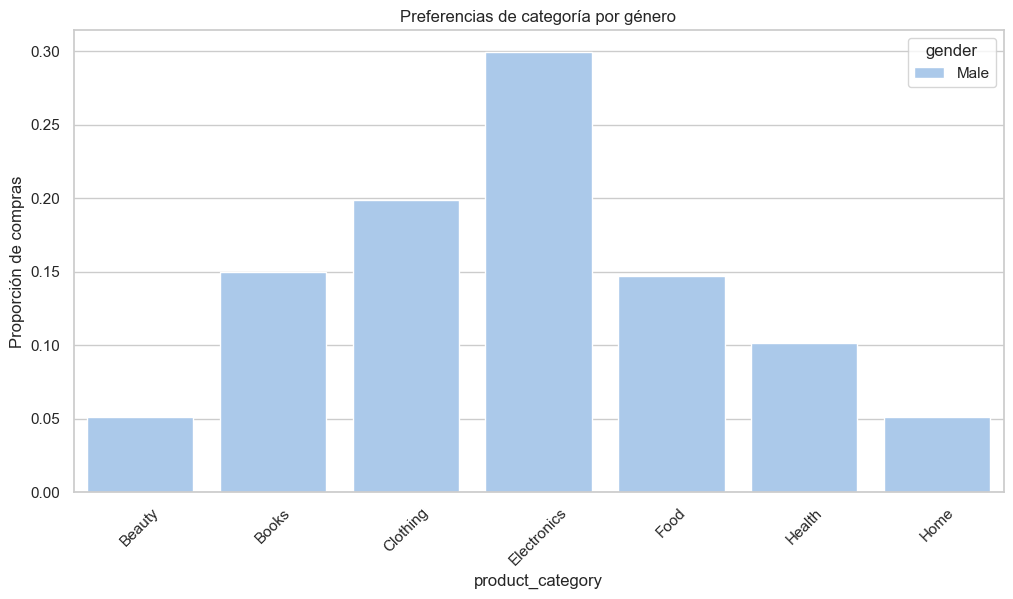

In [315]:
plt.figure(figsize=(12,6))
sns.barplot(data=male_data, x='product_category', y='proportion', hue='gender', palette='pastel')
plt.title('Preferencias de categoría por género')
plt.ylabel('Proporción de compras')
plt.xticks(rotation=45)
plt.show()

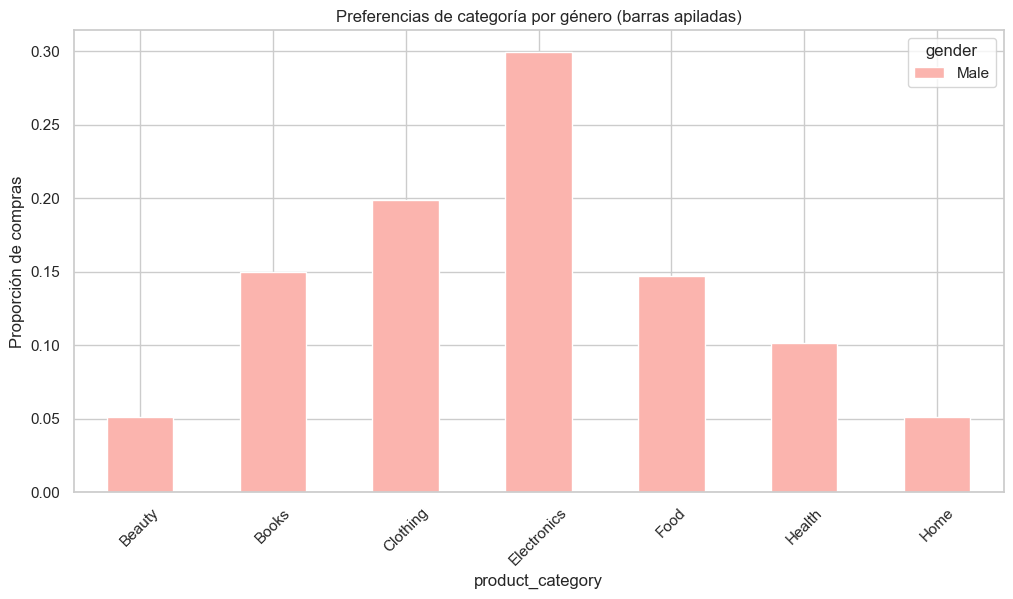

In [316]:
pivot_df = male_data.pivot(index='product_category', columns='gender', values='proportion')

pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Pastel1')
plt.title('Preferencias de categoría por género (barras apiladas)')
plt.ylabel('Proporción de compras')
plt.xticks(rotation=45)
plt.show()

<b>La distribución y preferencias de productos entre hombres y mujeres son muy similares, lo que coincide con que ambos géneros están representados casi por igual en la muestra.</b>

In [318]:
df_customer.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

<h4>Análisis de la columna: 'region'</h4>

In [320]:
df_customer['region'].value_counts()

region
East     29997
West     29861
South    20017
North    19857
Name: count, dtype: int64

In [321]:
df_customer['region'].describe()

count     99732
unique        4
top        East
freq      29997
Name: region, dtype: object

<h4>Análisis de la columna: 'income'</h4>

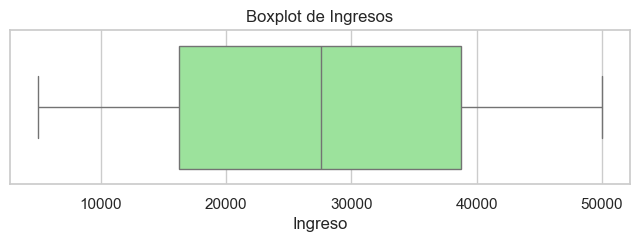

In [323]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_customer['income'], color='lightgreen')
plt.title('Boxplot de Ingresos')
plt.xlabel('Ingreso')
plt.show()

<b>Los valores están razonablemente distribuidos y no hay ingresos extremos que puedan distorsionar el análisis </b>

In [325]:
df_customer.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

<h4>Análisis de la columna "education" </h4>

In [327]:
df_customer['education'].value_counts()

education
College       39768
Bachelor      30194
HighSchool    19982
Masters        9788
Name: count, dtype: int64

In [328]:
df_customer['education'].describe()

count       99732
unique          4
top       College
freq        39768
Name: education, dtype: object

<h4>Análisis de la columna "loyalty_status" </h4>

In [330]:
df_customer['loyalty_status'].dtype

dtype('O')

In [331]:
df_customer['loyalty_status'].value_counts()

loyalty_status
Regular    59985
Silver     29876
Gold        9871
Name: count, dtype: int64

In [332]:
df_customer['loyalty_status'].describe()

count       99732
unique          3
top       Regular
freq        59985
Name: loyalty_status, dtype: object

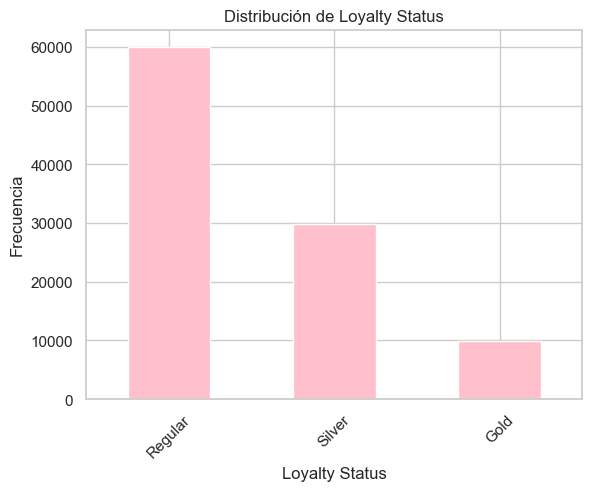

In [333]:
df_customer['loyalty_status'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribución de Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

<p>Esto podría indicar que, aunque se tiene un número considerable de clientes leales (como los de Gold o Silver), la mayoría de tus clientes no alcanzan un nivel de lealtad muy alto, sino que están en un punto medio Regular.</p>

<h4>Análisis de la columna "purchase_frequency" </h4>

In [336]:
df_customer['purchase_frequency'].dtype

dtype('O')

In [337]:
df_customer['purchase_frequency'].value_counts() 

purchase_frequency
rare          49885
occasional    29805
frequent      20042
Name: count, dtype: int64

In [338]:
# Datos
frecuencia = {
    'rare': 49885,
    'occasional': 29805,
    'frequent': 20042
}

# Total de registros
total = sum(frecuencia.values())

# Calcular proporciones
proporciones = {key: value / total for key, value in frecuencia.items()}
print(proporciones)

{'rare': 0.5001905105683231, 'occasional': 0.2988509204668512, 'frequent': 0.20095856896482572}


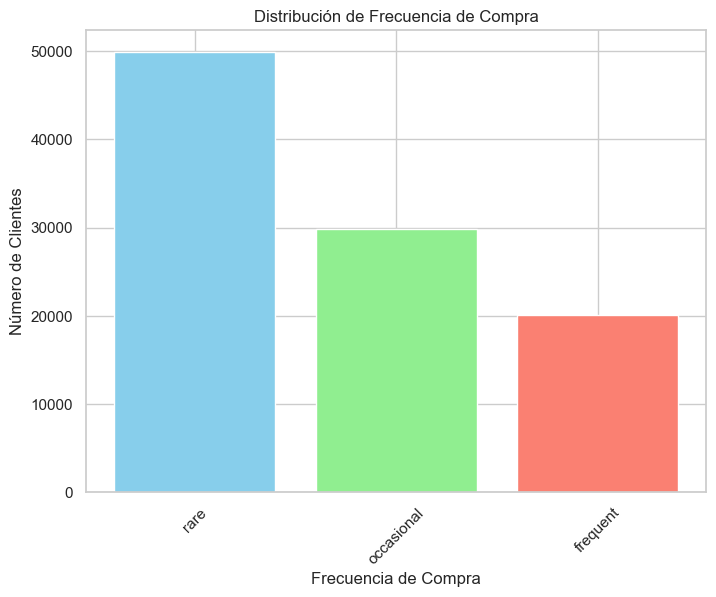

In [339]:
import matplotlib.pyplot as plt

# Datos para gráfico
categorias = list(frecuencia.keys())
valores = list(frecuencia.values())

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribución de Frecuencia de Compra')
plt.xlabel('Frecuencia de Compra')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

<p> A partir de la distribución de la frecuencia de compra, donde el 50% de los clientes compran raramente, el 30% lo hacen de manera ocasional y solo el 20% de manera frecuente, se observa una baja fidelidad entre los clientes. Esto indica que una gran parte de la base de clientes no tiene un comportamiento de compra regular.</p>

<h4>Análisis de la columna: "purchase_amount": </h4>

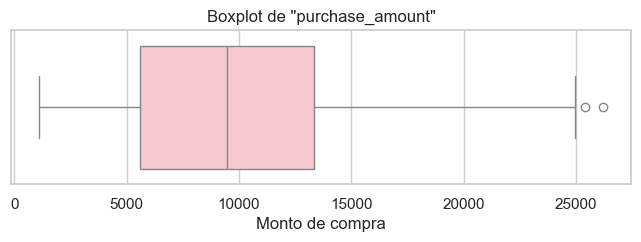

In [342]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_customer['purchase_amount'], color='pink')
plt.title('Boxplot de "purchase_amount"')
plt.xlabel('Monto de compra')
plt.show()

<b>En el análisis de los montos de compra, observamos algunos valores atípicos (outliers) que representan compras mucho más altas que el promedio. Estos valores son representados por los círculos fuera del rango en el boxplot. Aunque estos puntos se consideren técnicamente outliers, no los eliminaremos del análisis, ya que representan clientes de alto gasto y pueden ser fundamentales para entender ciertos patrones de consumo.</b>

<h4>Análisis de la columna: "product_category": </h4>

In [345]:
print(df_customer['product_category'].dtype)

object


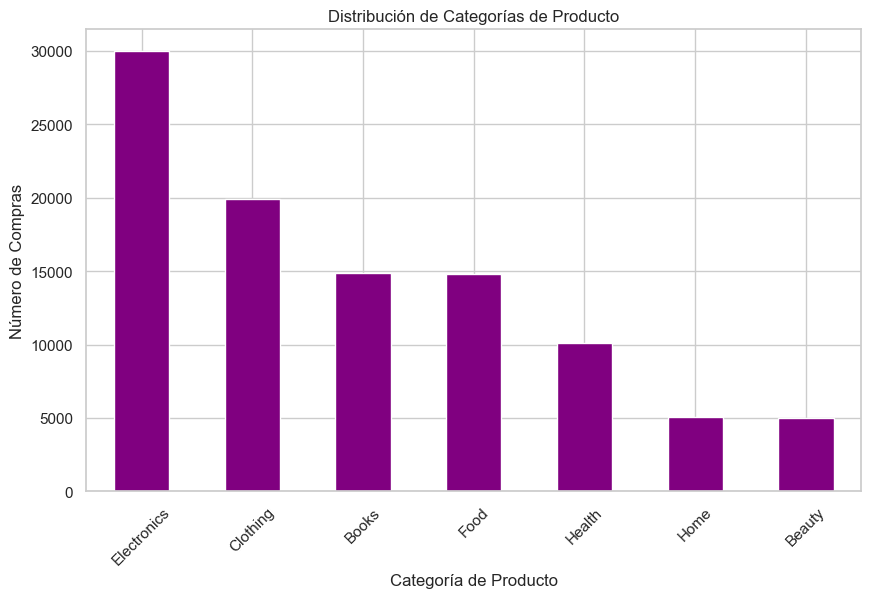

In [346]:
category_counts = df_customer['product_category'].value_counts()
# Gráfico de barras para visualizar la distribución
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='purple')
plt.title('Distribución de Categorías de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

<h4>Análisis de la columna: "promotion_usage": </h4>

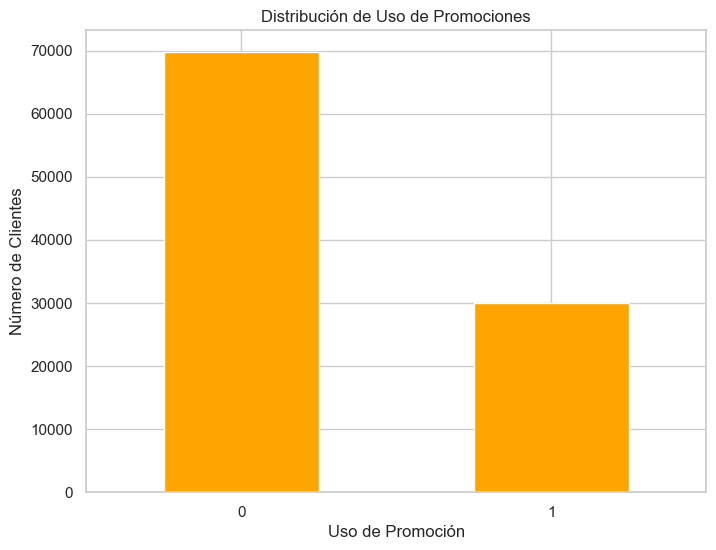

In [348]:
# Distribución de uso de promociones
promotion_usage_counts = df_customer['promotion_usage'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
promotion_usage_counts.plot(kind='bar', color='orange')
plt.title('Distribución de Uso de Promociones')
plt.xlabel('Uso de Promoción')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()
# 0 indica que el cliente no usa promociones
# 1 indica que el cliente usa promociones

<b>Podemos observar que la mayoria de los clientes no aprovechan las promociones.</b>

<h4>Análisis de la columna: "satisfaction_score"</h4>

In [351]:
print(df_customer['satisfaction_score'].dtype)

int64


In [352]:
# Ver los valores únicos de la columna 'satisfaction_score'
print(df_customer['satisfaction_score'].unique())

[ 6  7  5  3  4  2  8  9  1 10  0]


In [353]:
df_customer['satisfaction_score'].describe()

count    99732.000000
mean         5.009576
std          1.038846
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         10.000000
Name: satisfaction_score, dtype: float64

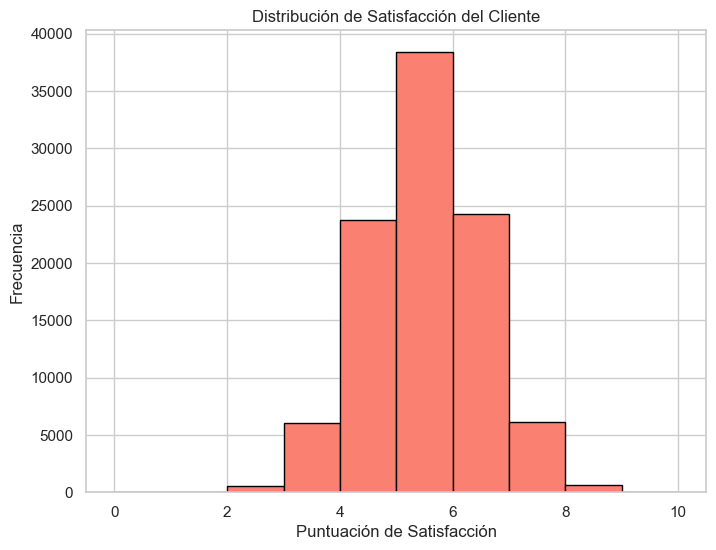

In [354]:
# Histograma de Rango de satisfacción de 0 a 10.
plt.figure(figsize=(8, 6))
df_customer['satisfaction_score'].plot(kind='hist', bins=10, color='salmon', edgecolor='black')
plt.title('Distribución de Satisfacción del Cliente')
plt.xlabel('Puntuación de Satisfacción')
plt.ylabel('Frecuencia')
plt.show()

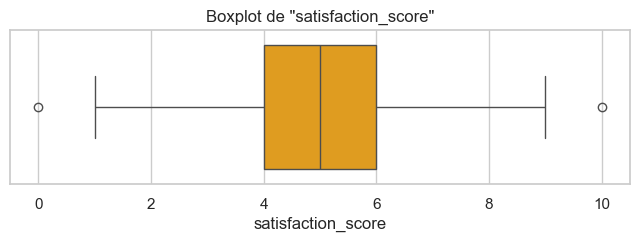

In [355]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_customer['satisfaction_score'], color='orange')
plt.title('Boxplot de "satisfaction_score"')
plt.xlabel('satisfaction_score')
plt.show()

<b>Al observar la distribución de los puntajes de satisfacción, podemos ver que la mayoría de los clientes se encuentran en los valores centrales de la escala, con una ligera inclinación hacia la satisfacción (valores cercanos a 5 y 6). Esto indica que muchos clientes se sienten satisfechos o neutros con su experiencia.</b> <br>
<b>En el boxplot de la distribución de los puntajes de satisfacción, podemos observar que los valores de 0 y 10 están fuera del rango intercuartílico y se identifican como outliers. Sin embargo, estos valores no serán eliminados, ya que representan extremos válidos de la escala: 0  muy insatisfecho, 10 muy satisfecho.</b>

<h3>Mapa de correlacion entre variables: Muestra qué variables están más relacionadas entre sí.</h3>

<Axes: >

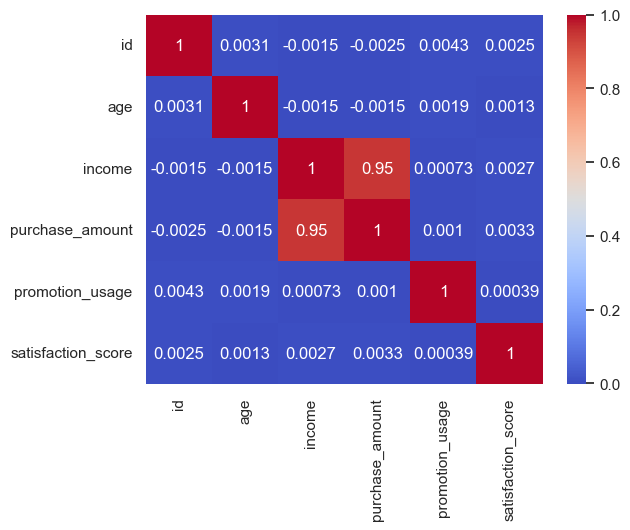

In [358]:
sns.heatmap(df_customer.corr(numeric_only=True), annot=True, cmap="coolwarm")

<b>Existe una relación significativa entre el ingreso de una persona y su gasto. Además, el uso de promociones muestra una relación moderada con el nivel de ingreso</b> 

<h3>Discretización de la variable 'age'</h3>

In [361]:
bins = [18, 24, 35, 49, 100] 
labels = ['18-24', '25-35', '36-49', '50+']

# Crear la columna 'age_group' con los grupos etarios definidos
df_customer['age_group'] = pd.cut(df_customer['age'], bins=bins, labels=labels, right=False)

# Verificar los primeros registros con la nueva columna 'age_group'
df_customer[['age', 'age_group']].head()

,age,age_group
0,27,25-35
1,29,25-35
2,37,36-49
3,30,25-35
4,31,25-35


In [362]:
# Agrupamos y calculamos
counts_age_group = df_customer.groupby(['age_group', 'product_category']).size().reset_index(name='count')
totals_age_group = counts_age_group.groupby('age_group')['count'].transform('sum')
counts_age_group['proportion'] = counts_age_group['count'] / totals_age_group

print(counts_age_group)

   age_group product_category  count  proportion
0      18-24           Beauty    322    0.045700
1      18-24            Books   1033    0.146608
2      18-24         Clothing   1445    0.205081
3      18-24      Electronics   2169    0.307834
4      18-24             Food   1003    0.142350
5      18-24           Health    714    0.101334
6      18-24             Home    360    0.051093
7      25-35           Beauty   3899    0.050707
8      25-35            Books  11504    0.149612
9      25-35         Clothing  15322    0.199267
10     25-35      Electronics  23098    0.300395
11     25-35             Food  11389    0.148117
12     25-35           Health   7764    0.100973
13     25-35             Home   3916    0.050929
14     36-49           Beauty    803    0.050845
15     36-49            Books   2341    0.148230
16     36-49         Clothing   3166    0.200469
17     36-49      Electronics   4690    0.296967
18     36-49             Food   2392    0.151460
19     36-49        

C:\Users\Micae\AppData\Local\Temp\ipykernel_15384\3070623568.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_age_group = df_customer.groupby(['age_group', 'product_category']).size().reset_index(name='count')
C:\Users\Micae\AppData\Local\Temp\ipykernel_15384\3070623568.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals_age_group = counts_age_group.groupby('age_group')['count'].transform('sum')


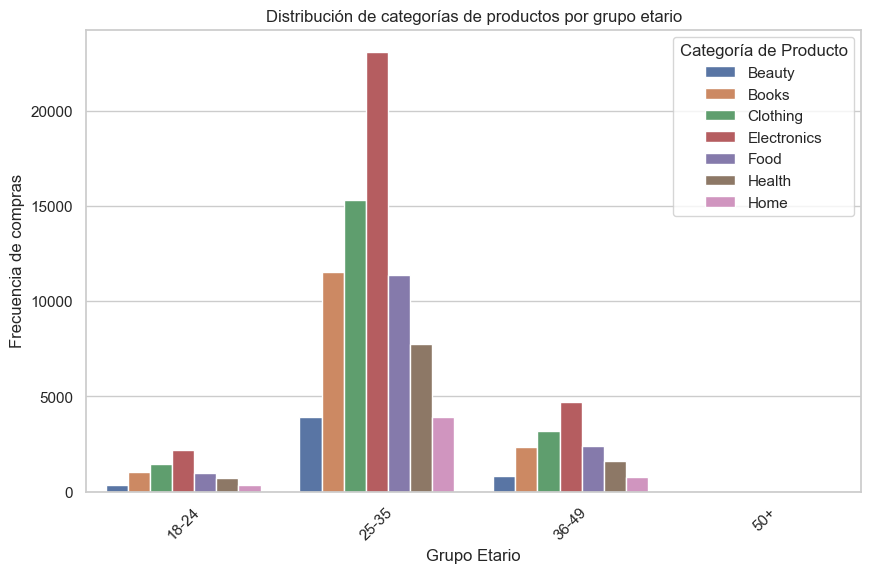

In [363]:
plt.figure(figsize=(10, 6))
sns.barplot(data=counts_age_group, x='age_group', y='count', hue='product_category')

plt.title('Distribución de categorías de productos por grupo etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Frecuencia de compras')
plt.xticks(rotation=45)
plt.legend(title='Categoría de Producto')

plt.show()

<h4>Conclusiones y Análisis final:</h4>

<b>Grupo etario: 18 - 24 años</b>
<p>La categoría más comprada por este grupo es Electrónica, seguida de Ropa.</p>
<p>Beauty (cosméticos) es la categoría con la menor preferencia en este grupo etario.</p>

<b>Grupo etario: 25 - 35 años</b>
<p>Al igual que el grupo anterior, Electrónica es la categoría más comprada, seguida de Ropa.</p>
<p>Beauty sigue siendo la categoría menos elegida en este grupo, aunque ha experimentado un pequeño aumento en comparación con el grupo anterior.</p>

<b>Grupo etario: 36 - 49 años</b>
<p>Electrónica es la categoría con mayor compra, seguida de Ropa.</p>
<p>Home es la categoría menos comprada, y se ha visto una disminución de compra en comparación con el grupo etario anterior.</p>

<b>Grupo Etario: 50+ años</b>
<p>Este grupo mostró pocos datos representativos, con solo una compra en Food.</p>

<ul>
<li>Electrónica es la categoría más comprada en todos los grupos etarios, mostrando una fuerte preferencia por productos tecnológicos a lo largo de las edades.</li>
<li>Ropa sigue siendo una categoría relevante, especialmente entre los grupos de menor edad (18-24 y 25-35), donde se encuentra en la segunda posición en cuanto a compras.</li>
<li>Por otro lado, Beauty (cosméticos) y Home tienen una baja preferencia generalizada, apareciendo en los últimos lugares en términos de compra en todos los grupos etarios.</li>
</ul>

<p>Aunque el objetivo principal de este análisis era detectar qué productos son los más comprados por ciertos grupos etarios, se optó por explorar todas las columnas del dataset en primer lugar. Esta estrategia permitió obtener una comprensión más profunda de los datos y sus relaciones, lo cual no solo aporta valor al análisis actual, sino que también abre la puerta a futuros estudios.</p>

<h2>Transformación de variables categóricas: </h2>

In [368]:
print(df_customer.dtypes) # Observamos las variables 'object'

id                       int64
age                      int64
gender                  object
income                   int64
education               object
region                  object
loyalty_status          object
purchase_frequency      object
purchase_amount          int64
product_category        object
promotion_usage          int64
satisfaction_score       int64
age_group             category
dtype: object


In [369]:
print(df_customer['age_group'].dtype) # Ordinal

category


In [370]:
df_customer['education'].value_counts() # No ordinal

education
College       39768
Bachelor      30194
HighSchool    19982
Masters        9788
Name: count, dtype: int64

In [371]:
df_customer['product_category'].value_counts() # No ordinal

product_category
Electronics    29957
Clothing       19933
Books          14878
Food           14785
Health         10093
Home            5062
Beauty          5024
Name: count, dtype: int64

In [372]:
df_customer['purchase_frequency'].value_counts() # Ordinal

purchase_frequency
rare          49885
occasional    29805
frequent      20042
Name: count, dtype: int64

In [373]:
df_customer['loyalty_status'].value_counts() # Ordinal

loyalty_status
Regular    59985
Silver     29876
Gold        9871
Name: count, dtype: int64

In [374]:
df_customer['region'].value_counts() # No tiene orden logico

region
East     29997
West     29861
South    20017
North    19857
Name: count, dtype: int64

In [375]:
# Aplicamos One-Hot Encoding a las variables que no siguen un orden:
df_customer = pd.get_dummies(df_customer, columns=['gender', 'region', 'education', 'product_category'], drop_first=True)

In [376]:
from sklearn.preprocessing import OrdinalEncoder

# Definimos el orden de cada variable
encoder = OrdinalEncoder(categories=[
    ["18-24", "25-35", "36-49", "50+"],         # age_group
    ["rare", "occasional", "frequent"],                  # purchase_frequency
    ["Regular", "Silver", "Gold"]               # loyalty_status
])

# Aplicamos al DataFrame
df_customer[['age_group', 'purchase_frequency', 'loyalty_status']] = encoder.fit_transform(
    df_customer[['age_group', 'purchase_frequency', 'loyalty_status']]
)

In [382]:
print(df_customer.dtypes)

id                                int64
age                               int64
income                            int64
loyalty_status                  float64
purchase_frequency              float64
purchase_amount                   int64
promotion_usage                   int64
satisfaction_score                int64
age_group                       float64
gender_Male                        bool
region_North                       bool
region_South                       bool
region_West                        bool
education_College                  bool
education_HighSchool               bool
education_Masters                  bool
product_category_Books             bool
product_category_Clothing          bool
product_category_Electronics       bool
product_category_Food              bool
product_category_Health            bool
product_category_Home              bool
dtype: object


<h2>Estandarización de variables </h2>